# Cyclone Track

We will see how we can query wave conditions from altimeter database along a specified cyclone track.

## Loading RADWave library and initialisation

We first start by importing **RADwave** library into our working space.

In [1]:
import RADWave as rwave

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

geopy is required and needs to be installed via pip


First we will use already downloaded dataset of track of cyclone YASI. The data was obtained from the Australian Bureau of Meteorology ([BOM cyclone tracks](http://www.bom.gov.au/cyclone/history/tracks/)).

To load this file in the `waveAnalysis` class, the cyclone track needs to be a `CSV` file with in the header having the following keyword names `lon`, `lat` & `datetime`. 

To only visualise the tracks on a map, a minimal number of options have to be set as shown in the cell below:

In [2]:
cyc = rwave.waveAnalysis(cycloneCSV='../../dataset/2010-YASI.csv')

Plotting the tracks is done by using the following function:

In [ ]:
cyc.plotCycloneTracks(title="Cyclone YASI Track", markersize=100, zoom=4, 
                     extent=[138, 180, -30, -10], fsize=(12, 10))

The geographical extent of the cyclone path and the associated time frame can be infered from the figure above. 

This was used to specify the altimeter data record **location** and **temporal extent** when using the Australian Ocean Data Network portal [AODN](https://portal.aodn.org.au/).


> As for the other examples, we recomend to look at **RADWave** [documentation](https://radwave.readthedocs.io/en/latest/usage.html#getting-altimeter-values-from-data-providers) and the embeded video that explain how to select both a spatial bounding box and a temporal extent from the portal and how to export the file containing the `List of URLs`. This `TXT` file contains a list of `NETCDF` files for each available satellites. 


We will now create 2 new **RADWave** classes names (`wa_east` and `wa_west`) that will, in addition to the cyclone track, set the list of altimeter `NETCDF` URLs files to query for the analyse in 2 different regions.

For a detail overview of the options available in this class, you can have a look at the [waveAnalysis API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis).


We also call the `processAltimeterData` function to query the actual dataset and store the altimeter data in each class. The description of this function is available from the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.processingAltimeterData).

## For the eastern region

In [3]:
wa_east = rwave.waveAnalysis(altimeterURL='../../dataset/IMOS_YASI_east.txt', bbox=[170, 175, -17, -12], 
                  stime=[2011,1,27], etime=[2011,2,4], cycloneCSV='../../dataset/2010-YASI.csv')

wa_east.processAltimeterData(altimeter_pick='all', saveCSV = 'altimeterDataE.csv')

Processing Altimeter Dataset 

   +  name JASON-2     / number of tracks                               19  
   +  name CRYOSAT-2   / number of tracks                               25  
   +  name ENVISAT     / number of tracks                               25  
 
Processing altimeter dataset took:  2 s


## For the western region

In [4]:
wa_west = rwave.waveAnalysis(altimeterURL='../../dataset/IMOS_YASI_west.txt', bbox=[156, 161, -16, -12], 
                  stime=[2011,1,27], etime=[2011,2,4], cycloneCSV='../../dataset/2010-YASI.csv')

wa_west.processAltimeterData(altimeter_pick='all', saveCSV = 'altimeterDataW.csv')

Processing Altimeter Dataset 

   +  name JASON-2     / number of tracks                               16  
   +  name CRYOSAT-2   / number of tracks                               20  
   +  name ENVISAT     / number of tracks                               20  
 
Processing altimeter dataset took:  2 s


In the case where a cyclone track is given when initialising the `waveAnalysis` class, the `visualiseData` plots not only the extent of the altimeter dataset but also the associated path.

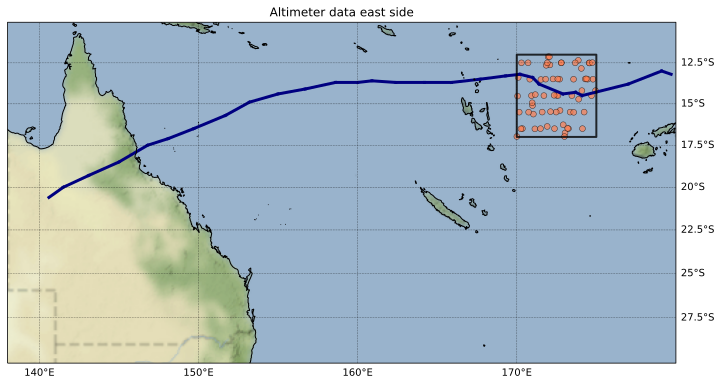

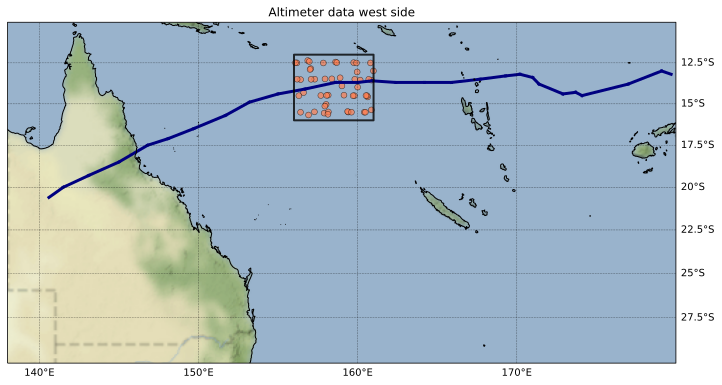

In [5]:
wa_east.visualiseData(title="Altimeter data east side", extent=[138, 180, -30, -10.0], 
                 markersize=35, zoom=4, fsize=(12, 10), fsave=None)

wa_west.visualiseData(title="Altimeter data west side", extent=[138, 180, -30, -10.0], 
                 markersize=35, zoom=4, fsize=(12, 10), fsave=None)

# Extracting relevant wave dataset

Once the data has been loaded, the following step consist in computing the wave [parameters](https://radwave.readthedocs.io/en/latest/method.html#) by running the `generateTimeSeries` function.

This function computes both **instantaneous** and **monthly** wave variables:

+ significant wave height (m) - wh & wh_rolling
+ wave period (s)  - period & period_rolling
+ wave energy flux (kW/m)  - power & power_rolling
+ wave average energy density (J/m2)  - energy & energy_rolling
+ wave group velocity (m/s)  - speed & speed_rolling

In [6]:
wa_east.generateTimeSeries()

wa_west.generateTimeSeries()

,date,wh,wh_rolling,period,period_rolling,power,power_rolling,energy,energy_rolling,speed,speed_rolling,lat,lon,day,month,year
0,2011-01-27 23:20:15.164062,1.041000,1.041000,5.417088,5.417088,11.512319,11.512319,1361.620547,1361.620547,8.454866,8.454866,-12.452410,158.60977,27,1,2011
1,2011-01-27 23:20:32.421874,1.306000,1.173500,5.533521,5.475305,18.509016,15.010668,2143.092786,1752.356667,8.636591,8.545728,-13.479210,158.37648,27,1,2011
2,2011-01-27 23:20:49.140623,1.571000,1.306000,5.547955,5.499522,26.852254,18.957863,3101.037223,2201.916852,8.659120,8.583526,-14.472649,158.14943,27,1,2011
3,2011-01-27 23:20:58.601560,1.654000,1.393000,5.575570,5.518534,29.912703,21.696573,3437.364318,2510.778719,8.702221,8.613199,-15.035489,158.02014,27,1,2011
4,2011-01-27 23:21:07.523439,1.817000,1.477800,5.691659,5.553159,36.850570,24.727372,4148.246011,2838.272177,8.883410,8.667242,-15.565145,157.89804,27,1,2011
5,2011-01-28 11:44:12.027346,1.538000,1.487833,4.199436,5.327538,19.480453,23.852886,2972.126441,2860.581221,6.554382,8.315098,-15.679586,156.91219,28,1,2011
6,2011-01-28 11:44:34.867189,1.782000,1.529857,4.929000,5.270604,30.695139,24.830351,3989.973416,3021.922963,7.693069,8.226237,-14.322248,156.59991,28,1,2011
7,2011-01-28 11:44:48.234376,1.784000,1.561625,5.350195,5.280553,33.392942,25.900675,3998.934162,3144.049363,8.350461,8.241765,-13.527493,156.41833,28,1,2011
8,2011-01-28 11:45:05.496096,1.657000,1.572222,5.330808,5.286137,28.703410,26.212090,3449.845321,3178.026692,8.320202,8.250480,-12.500715,156.18501,28,1,2011
9,2011-01-28 23:17:55.007812,1.208500,1.535850,5.520646,5.309588,15.811700,25.172051,1835.049837,3043.729006,8.616496,8.287082,-15.500918,159.40955,28,1,2011


From the cyclone track, we find the closest processed altimeter geographical locations that have been recorded in the database (based on a `KDTree` search). 

> In addition to their coordinates, the altimeter dataset has to be recorded during a user defined time lapse close enough to the cyclone path time at each position.

This is done using the `close2Track` function that takes the following arguments:

+ `radius`, the maximum radius distance in degree between cyclone position and altimeter data coordinates [here set to 2.]
+ `dtmax`, the maximum difference in time between recorded cyclone date and picked altimeter data (hours) [here set to 6]

This function stores a Pandas dataframe in the `waveAnalysis` class called `cyclone_data` that contains the following variables:

+ altimeter significant wave height (m) - wH
+ altimeter wave period (s) - period
+ altimeter wave energy flux (kW/m) - power
+ altimeter wave average energy density (J/m2) - energy
+ altimeter wave group velocity (m/s) - speed
+ distance between altimeter coordinates and cyclone path (km) - dist
+ cyclone date (datetime) - cdate 
+ difference in time between recorded cyclone date and altimeter data for specific position (hours) - hours
+ cyclone latitude position - clat
+ cyclone longitude position - clon
+ altimeter data latitude position - lat
+ altimeter data longitude position - lon

Depending of the available altimeters dataset and the chosen `radius` and `dtmax` parameters, the Pandas dataframe `cyclone_data` will contain different number of values (or can potentially be empty).

In [7]:
wa_east.close2Track(radius=2.,dtmax=6.)
display(wa_east.cyclone_data)

wa_west.close2Track(radius=2.,dtmax=6.)
display(wa_west.cyclone_data)

NameError: name 'geopy' is not defined

# Visualising the relevant altimeters date

**RADWave** provides a plotting function to visualise the processed wave data called `plotCycloneAltiPoint` that can be used to also provide information about wave parameters for each data point (by turning the `showinfo` flag to True as explained in the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.cycloneAltiPoint).

An example of how to call this function is presented below:

In [ ]:
wa_west.plotCycloneAltiPoint(showinfo=False, extent=[138, 180, -18, -10], 
                 markersize=35, zoom=4, fsize=(12, 5))

In [ ]:
wa_west.plotCycloneAltiPoint(showinfo=True, extent=[138, 180, -18, -10], 
                 markersize=35, zoom=4, fsize=(12, 5))

> As already mentioned in the different examples, the class **waveAnalysis()** saves most of the processed wave data as Pandas dataframe (such as `timeseries` or `cyclone_data`) that can be used for further analysis.